# Exploratory Data Analysis

# Import necessary librairies

In [11]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Load dataset

In [12]:
# Get the absolute path to the credit_default_prediction directory
credit_default_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

# Construct the path to the CSV file
data_name = 'train_topred.csv'
data_path = credit_default_dir + '/data/raw/' + data_name

# Load the CSV file into a pandas dataframe
df = pd.read_csv(data_path)
df.head()

,customer_id,simulation_id,loan_id,request_datetime,reimbursement_date,algo1_eligible_amount,algo2_eligible_amount,mean_countcashout_20_weeks,mean_airtime_balance_20_weeks,mean_volotherout,mean_volcashout_20_weeks,mean_balance_20_weeks,ratio_active_profile,awareness_indice,is_default60
0,customer_214568157,simulation_9bdb122d7,loan_234c90053,2021-02-13 15:07:51.392,2021-03-15,28874.872964,24415.986393,0.110198,10.749030,137.356117,43034.784930,4628.804801,0.794999,111105.515189,1.0
1,customer_8b8004a5f,simulation_a21679f89,loan_f2a468b83,2020-07-30 21:37:44.442,2020-08-30,830.339108,4462.503483,0.056128,131.163084,42.401318,5222.767652,3889.942074,0.674275,252011.901109,0.0
2,customer_0d466cdf2,simulation_e57afa639,loan_c1afb3eda,2020-08-23 15:11:42.087,2020-09-22,51822.237442,75189.327491,0.567690,42.266660,312.466782,23038.404464,13800.932517,0.245463,235158.389478,0.0
3,customer_762c8f4bc,simulation_9eaf91941,loan_e6f7a8fbb,2020-08-31 18:00:04.873,2020-09-30,1865.496542,6400.901403,0.169214,111.608549,338.549751,9897.466939,312.578495,0.691704,255626.351269,1.0
4,customer_d1c1529bc,simulation_5d35eb47d,loan_f5ec62598,2021-02-12 17:17:44.344,2021-03-14,4562.433908,5398.122156,0.170014,9.073107,206.502945,3943.852214,135.202018,0.583585,104721.891496,1.0


In [13]:
df

,customer_id,simulation_id,loan_id,request_datetime,reimbursement_date,algo1_eligible_amount,algo2_eligible_amount,mean_countcashout_20_weeks,mean_airtime_balance_20_weeks,mean_volotherout,mean_volcashout_20_weeks,mean_balance_20_weeks,ratio_active_profile,awareness_indice,is_default60
0,customer_214568157,simulation_9bdb122d7,loan_234c90053,2021-02-13 15:07:51.392,2021-03-15,28874.872964,24415.986393,0.110198,10.749030,137.356117,43034.784930,4628.804801,0.794999,111105.515189,1.0
1,customer_8b8004a5f,simulation_a21679f89,loan_f2a468b83,2020-07-30 21:37:44.442,2020-08-30,830.339108,4462.503483,0.056128,131.163084,42.401318,5222.767652,3889.942074,0.674275,252011.901109,0.0
2,customer_0d466cdf2,simulation_e57afa639,loan_c1afb3eda,2020-08-23 15:11:42.087,2020-09-22,51822.237442,75189.327491,0.567690,42.266660,312.466782,23038.404464,13800.932517,0.245463,235158.389478,0.0
3,customer_762c8f4bc,simulation_9eaf91941,loan_e6f7a8fbb,2020-08-31 18:00:04.873,2020-09-30,1865.496542,6400.901403,0.169214,111.608549,338.549751,9897.466939,312.578495,0.691704,255626.351269,1.0
4,customer_d1c1529bc,simulation_5d35eb47d,loan_f5ec62598,2021-02-12 17:17:44.344,2021-03-14,4562.433908,5398.122156,0.170014,9.073107,206.502945,3943.852214,135.202018,0.583585,104721.891496,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121426,customer_8e99a8ee0,simulation_947d6a663,loan_0f0663e2b,2021-03-12 15:14:06.58,2021-04-11,5621.728484,5990.674305,0.079480,57.862166,76.052428,7859.077672,63.249766,0.863965,94227.689621,0.0
121427,customer_23b99bfb9,simulation_c10b34844,loan_77149bdb3,2021-03-24 09:10:05.183,2021-04-23,11224.022847,11960.999604,0.291890,16.104266,17.101075,14036.343853,4184.308988,0.386345,263284.182829,0.0
121428,customer_b7437bd03,simulation_e143599c8,loan_668cf41f6,2021-03-29 12:04:36.155,2021-04-28,11995.754324,12328.263450,0.119279,10.229231,424.873921,27153.602472,312.996186,0.704790,50787.627322,0.0
121429,customer_f064b0408,simulation_051974078,loan_a0f842671,2021-04-10 20:05:01.942,2021-05-11,44164.560625,50203.093330,0.074238,745.355595,14221.587985,5755.349429,25422.141874,0.252444,49078.069084,1.0


# Description of the dataset 

In [3]:
# Display the first few rows of the dataset
df.head()

,customer_id,simulation_id,loan_id,request_datetime,reimbursement_date,algo1_eligible_amount,algo2_eligible_amount,mean_countcashout_20_weeks,mean_airtime_balance_20_weeks,mean_volotherout,mean_volcashout_20_weeks,mean_balance_20_weeks,ratio_active_profile,awareness_indice,is_default60
0,customer_214568157,simulation_9bdb122d7,loan_234c90053,2021-02-13 15:07:51.392,2021-03-15,28874.872964,24415.986393,0.110198,10.749030,137.356117,43034.784930,4628.804801,0.794999,111105.515189,1.0
1,customer_8b8004a5f,simulation_a21679f89,loan_f2a468b83,2020-07-30 21:37:44.442,2020-08-30,830.339108,4462.503483,0.056128,131.163084,42.401318,5222.767652,3889.942074,0.674275,252011.901109,0.0
2,customer_0d466cdf2,simulation_e57afa639,loan_c1afb3eda,2020-08-23 15:11:42.087,2020-09-22,51822.237442,75189.327491,0.567690,42.266660,312.466782,23038.404464,13800.932517,0.245463,235158.389478,0.0
3,customer_762c8f4bc,simulation_9eaf91941,loan_e6f7a8fbb,2020-08-31 18:00:04.873,2020-09-30,1865.496542,6400.901403,0.169214,111.608549,338.549751,9897.466939,312.578495,0.691704,255626.351269,1.0
4,customer_d1c1529bc,simulation_5d35eb47d,loan_f5ec62598,2021-02-12 17:17:44.344,2021-03-14,4562.433908,5398.122156,0.170014,9.073107,206.502945,3943.852214,135.202018,0.583585,104721.891496,1.0


The descriptions below were provided for a better understanding of each feature: 

|        Column               |                                            Description                                           |
|:---------------------------:|:------------------------------------------------------------------------------------------------:|
|     customer_id             |                           Unique identifier of the customer                                      |
|    simulation_id            |                   Unique identifier of the customer's credit demand                              |
|       loan_id               |                       Unique identifier of a loan if response is positive                        | 
|  request_datetime           |                            Date and time of the credit demand                                    |
|  reimbursement_date         |                                           Loan due date                                          |
|  algo1_eligible_amount      |                  Calculated eligible amount with an internal algorithm                           |
|  algo2_eligible_amount      |              Calculated eligible amount with a more complex algorithm                            |
|mean_countcashout_20_weeks   |         Average number of money cashout (weekly) transactions over the last 20 weeks             |
|mean_airtime_balance_20_weeks|        Average of airtime balance (at end of week) over the last 20 weeks                        |
|     mean_volotherout        | Average of total amount of other transactions, when the customer is debited, (not included in the other variables and which generate an decrease in the secondary money balance, transactions which credit the customer's secondary money account and which have not been counted by the previous ones), weekly, over the last 20 weeks| 
| mean_volcashout_20_weeks    |  Average of secondary money wallet cashout (total of the week) over the last 20 weeks               |
| mean_balance_20_weeks       | Average of secondary money wallet balance (at end of week) over the last 20 weeks                   |
| ratio_active_profile        |                        Reflects the volatility in the customer's transactions                 |
| awareness_indice            |                   A component estimating the client's ability to understand the offer            |
|  default_60days             | TARGET : False if the customer reimbursed the credit before 60 days (counting from disbursement date), else True |


In [4]:
# Display dataset's summary statistics
df.describe()

,algo1_eligible_amount,algo2_eligible_amount,mean_countcashout_20_weeks,mean_airtime_balance_20_weeks,mean_volotherout,mean_volcashout_20_weeks,mean_balance_20_weeks,ratio_active_profile,awareness_indice,is_default60
count,121431.000000,121431.000000,121431.000000,121431.000000,121431.000000,121431.000000,1.214310e+05,121431.000000,121431.000000,121431.000000
mean,39077.183694,34998.470147,0.211941,463.225302,4215.569305,15692.936598,8.463274e+03,0.484284,184145.319262,0.387850
std,56063.787026,34751.099689,0.154720,11318.407897,25237.768344,22178.006942,2.222947e+04,0.205360,81300.495098,0.487262
min,441.898094,4045.236918,0.000000,-1.836770,0.000000,0.000000,0.000000e+00,0.000000,9186.568761,0.000000
25%,4784.340537,6438.790363,0.091831,5.321652,108.614929,3203.874083,5.704671e+02,0.341468,100021.844169,0.000000
50%,16235.542601,18608.683323,0.175470,22.128833,745.115829,8026.724965,2.162163e+03,0.486880,237359.917410,0.000000
75%,47695.298064,55818.078401,0.295920,66.680112,2787.700451,18775.640868,7.275373e+03,0.633550,252531.473716,1.000000
max,292485.142874,280412.304393,1.080348,376563.892229,813233.178493,881669.963989,1.326540e+06,1.055020,301432.621178,1.000000


- The standard deviations of some columns are considerably high, such as "algo1_eligible_amount", "algo2_eligible_amount", and "mean_balance_20_weeks", indicating a wide range of values and possible outliers.
- Some columns, such as "mean_airtime_balance_20_weeks", have negative minimum values, indicating possible errors or inconsistencies in the data.

In [5]:
neg_airtime_rows = df.loc[df["mean_airtime_balance_20_weeks"] < 0]
neg_airtime_rows

,customer_id,simulation_id,loan_id,request_datetime,reimbursement_date,algo1_eligible_amount,algo2_eligible_amount,mean_countcashout_20_weeks,mean_airtime_balance_20_weeks,mean_volotherout,mean_volcashout_20_weeks,mean_balance_20_weeks,ratio_active_profile,awareness_indice,is_default60
101614,customer_5452f8b63,simulation_5f2b07ec2,loan_fe3872185,2020-11-03 12:12:39.61,2020-12-03,70069.673105,70670.293049,0.56444,-1.83677,3815.767503,27589.442695,1663.982121,0.201905,241359.185007,0.0


In [6]:
df = df.loc[df["mean_airtime_balance_20_weeks"] >= 0]

We will also get rid of neg_airtime_rows in the processing step before model training (see modeling notebook)

In [7]:
# Display dataset's info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121430 entries, 0 to 121430
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    121430 non-null  object 
 1   simulation_id                  121430 non-null  object 
 2   loan_id                        121430 non-null  object 
 3   request_datetime               121430 non-null  object 
 4   reimbursement_date             121430 non-null  object 
 5   algo1_eligible_amount          121430 non-null  float64
 6   algo2_eligible_amount          121430 non-null  float64
 7   mean_countcashout_20_weeks     121430 non-null  float64
 8   mean_airtime_balance_20_weeks  121430 non-null  float64
 9   mean_volotherout               121430 non-null  float64
 10  mean_volcashout_20_weeks       121430 non-null  float64
 11  mean_balance_20_weeks          121430 non-null  float64
 12  ratio_active_profile          

In [8]:
df["loan_id"][df["loan_id"].duplicated()]

112447    loan_303fc42cf
Name: loan_id, dtype: object

In [9]:
df[df["loan_id"] == 'loan_303fc42cf']

,customer_id,simulation_id,loan_id,request_datetime,reimbursement_date,algo1_eligible_amount,algo2_eligible_amount,mean_countcashout_20_weeks,mean_airtime_balance_20_weeks,mean_volotherout,mean_volcashout_20_weeks,mean_balance_20_weeks,ratio_active_profile,awareness_indice,is_default60
109985,customer_8cf9f1b27,simulation_365e4809f,loan_303fc42cf,2020-11-03 09:16:46.895,2020-12-03,23450.075868,35740.769259,0.239141,624.974814,0.000000,17411.339796,6479.326163,0.487248,104022.042337,0.0
112447,customer_44abd1870,simulation_598f0187b,loan_303fc42cf,2020-12-16 11:01:04.193,2021-01-15,15945.077448,14994.830688,0.000000,14.685812,16582.648891,0.000000,864.810082,0.040791,105847.671018,1.0


We have to ask the business why we have the same load ID for two different customers before taking the decision of deleting it. 

# Data Visualization

Now, let's visualize the data to gain deeper insights.

## Histograms

In [10]:
numeric_features = ['algo1_eligible_amount', 'algo2_eligible_amount', 'mean_countcashout_20_weeks', 'mean_airtime_balance_20_weeks','mean_volotherout', 'mean_volcashout_20_weeks', 'mean_balance_20_weeks', 'awareness_indice']
df_num = df[numeric_features]

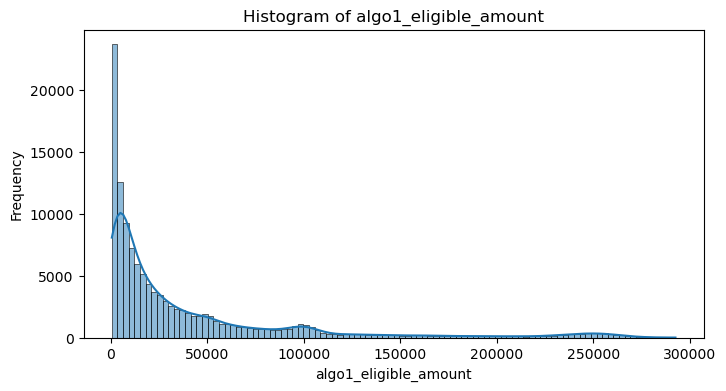

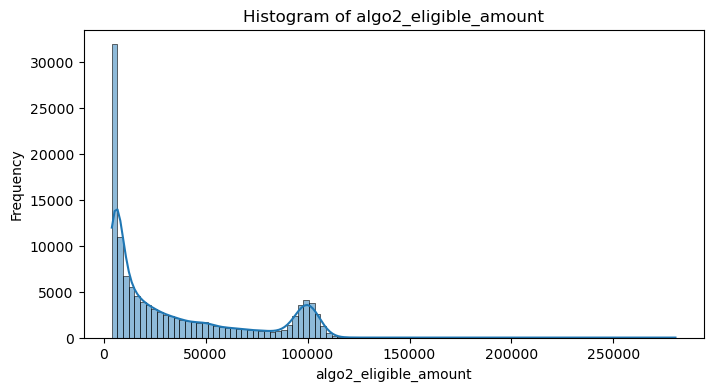

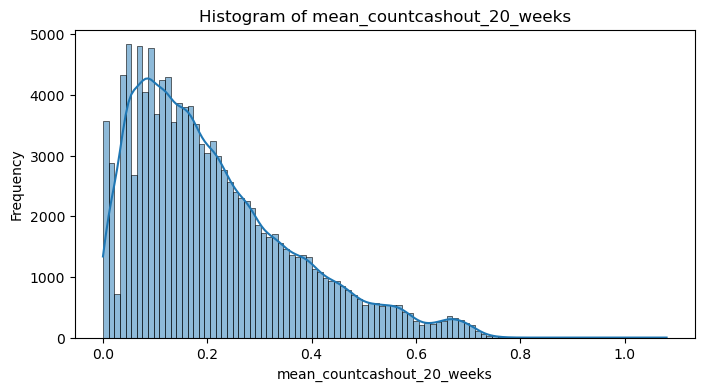

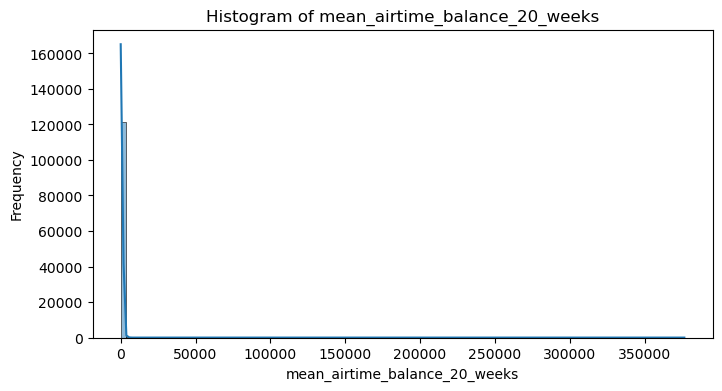

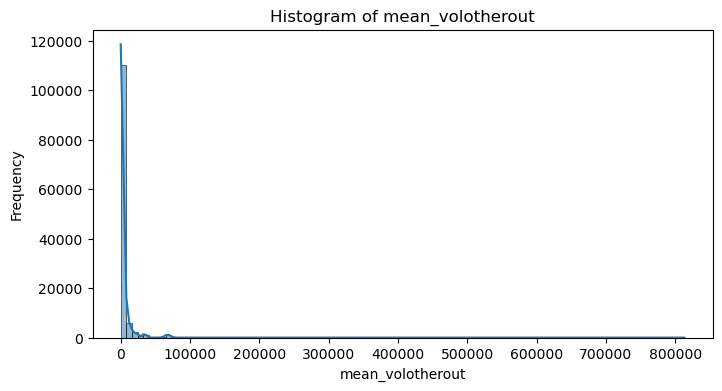

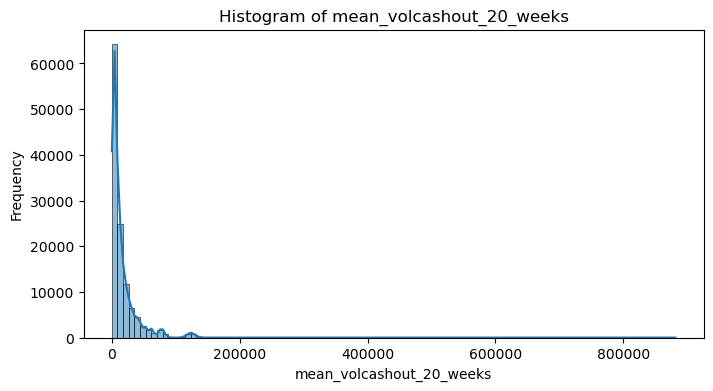

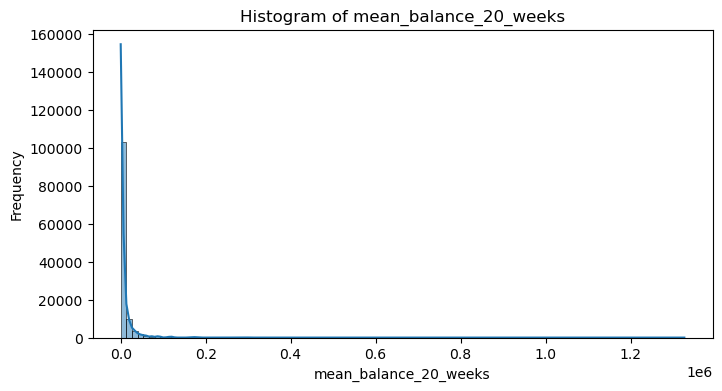

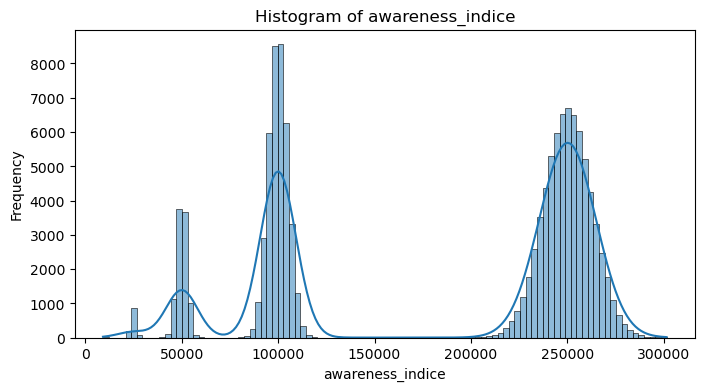

In [11]:
# Histograms for all numeric features
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=100, kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()

Main takeaways:

- From the histograms, we can observe that several features such as algo1_eligible_amount, algo2_eligible_amount, mean_count_cashout_20weeks, mean_airtime_balance, mean_volotherout_20weeks, mean_volcashout_20weeks, and mean_balance_20weeks are right skewed. This indicates that these features have values that are concentrated on the lower end of their range, and that there may be a significant number of outliers towards the higher end of the range. Before identifying data points as outliers and removing them, it is essential to consult with the business stakeholders to ensure that crucial information is not lost. 

- On the other hand, the ratio_active_profile feature appears to be normally distributed, indicating that values are evenly distributed around its mean.

- Regarding the awareness_indice feature, we can observe that it has multiple peaks centered around 50,000, 100,000 and 250,000. This suggests that there may be different groups of customers with different levels of awareness of the offer.

- In our context, these findings can be useful in several ways. For instance, the right-skewed features may need to be transformed to a more normal distribution to ensure better performance of models that assume normality. Additionally, the multi-modal distribution of the awareness_indice feature may suggest that different marketing strategies may be needed for customers in different groups.

## Correlation heatmap

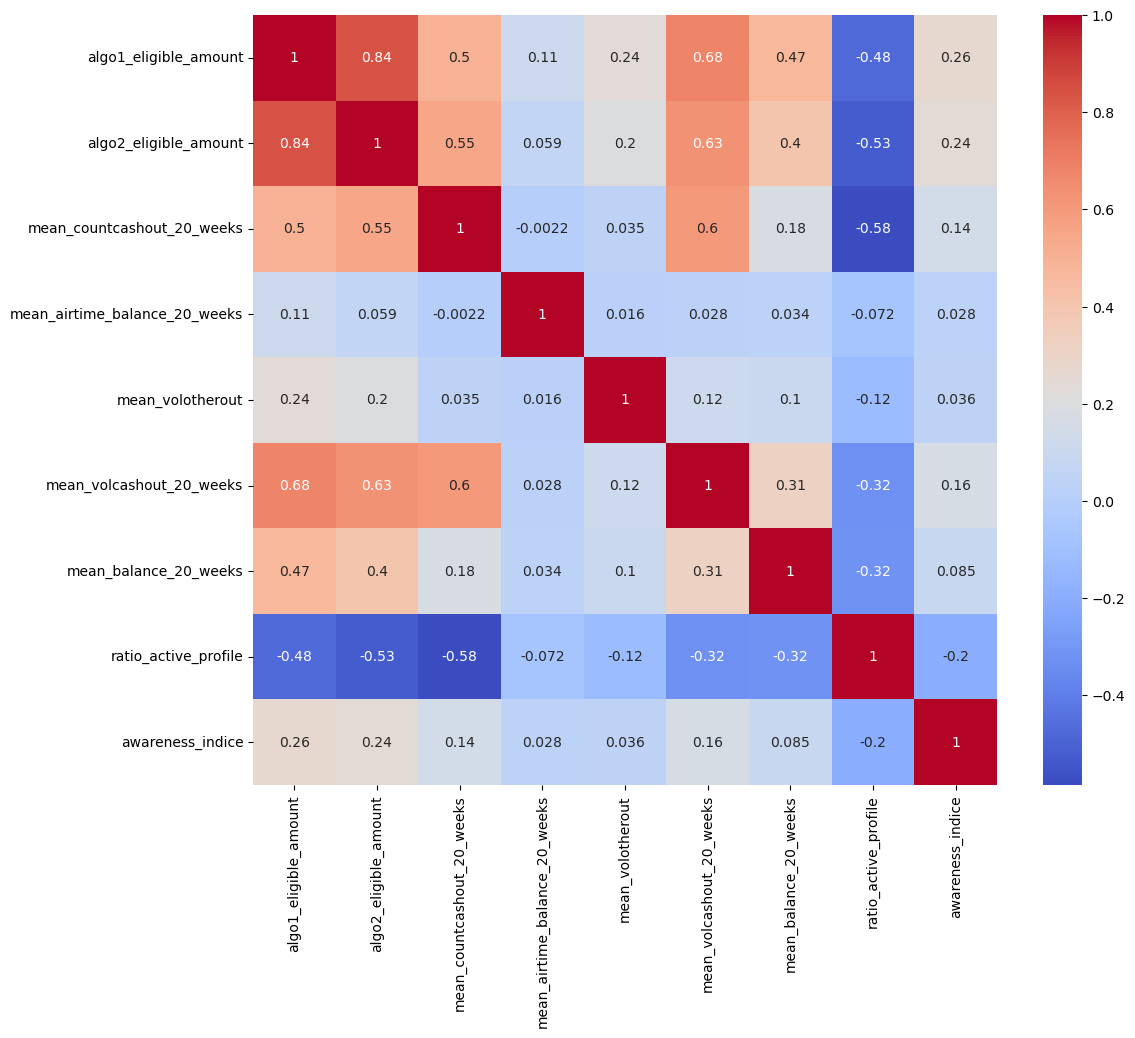

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.drop("is_default60", axis=1).corr(), annot=True, cmap="coolwarm")
plt.show()

Based on the correlation matrix and the dataset description, we can make the following observations with the specific correlation values:

- algo1_eligible_amount and algo2_eligible_amount have a strong positive correlation of 0.84, indicating that the two algorithms generally agree on the eligible amount for a customer.
- mean_countcashout_20_weeks (0.50 for algo1 and 0.55 for algo2), mean_volcashout_20_weeks (0.68 for algo1 and 0.63 for algo2), and mean_balance_20_weeks (0.47 for algo1 and 0.40 for algo2) are positively correlated with both algo1_eligible_amount and algo2_eligible_amount. This suggests that customers with higher average cashout transactions, cashout volumes, and balances in the last 20 weeks are likely to be eligible for larger loan amounts.
- ratio_active_profile has a negative correlation with both algo1_eligible_amount (-0.47) and algo2_eligible_amount (-0.53). This suggests that customers with more volatile transaction patterns may be considered less eligible for larger loan amounts.
- awareness_indice has a weak positive correlation with both algo1_eligible_amount (0.26) and algo2_eligible_amount (0.24). This indicates that customers with a better understanding of the offer might be slightly more eligible for larger loan amounts, but this relationship is not very strong.


In [13]:
# Set display option
pd.set_option('display.max_columns', None)
# Create a correlation matrix
correlation_matrix = df.drop("is_default60", axis=1).corr()

# Print the correlation matrix as a DataFrame
correlation_df = pd.DataFrame(correlation_matrix)
print("Correlation Matrix:")
correlation_df


Correlation Matrix:


,algo1_eligible_amount,algo2_eligible_amount,mean_countcashout_20_weeks,mean_airtime_balance_20_weeks,mean_volotherout,mean_volcashout_20_weeks,mean_balance_20_weeks,ratio_active_profile,awareness_indice
algo1_eligible_amount,1.000000,0.842352,0.501971,0.110687,0.236266,0.680114,0.472375,-0.476607,0.263680
algo2_eligible_amount,0.842352,1.000000,0.553128,0.059278,0.196785,0.629978,0.404513,-0.528879,0.241341
mean_countcashout_20_weeks,0.501971,0.553128,1.000000,-0.002184,0.034931,0.600962,0.175060,-0.584601,0.140456
mean_airtime_balance_20_weeks,0.110687,0.059278,-0.002184,1.000000,0.016100,0.027585,0.034196,-0.071860,0.028478
mean_volotherout,0.236266,0.196785,0.034931,0.016100,1.000000,0.116210,0.102079,-0.124117,0.036026
mean_volcashout_20_weeks,0.680114,0.629978,0.600962,0.027585,0.116210,1.000000,0.314093,-0.324770,0.164792
mean_balance_20_weeks,0.472375,0.404513,0.175060,0.034196,0.102079,0.314093,1.000000,-0.324302,0.084681
ratio_active_profile,-0.476607,-0.528879,-0.584601,-0.071860,-0.124117,-0.324770,-0.324302,1.000000,-0.199373
awareness_indice,0.263680,0.241341,0.140456,0.028478,0.036026,0.164792,0.084681,-0.199373,1.000000


## Point Biseral correlation

The Point Biserial Correlation Results indicate the correlation between the target variable (default_60days) and each of the numeric features. A negative value suggests that an increase in the feature is associated with a decrease in the likelihood of default, while a positive value suggests the opposite. The results show that some features have a weak correlation with the target variable, while others have a moderate correlation.

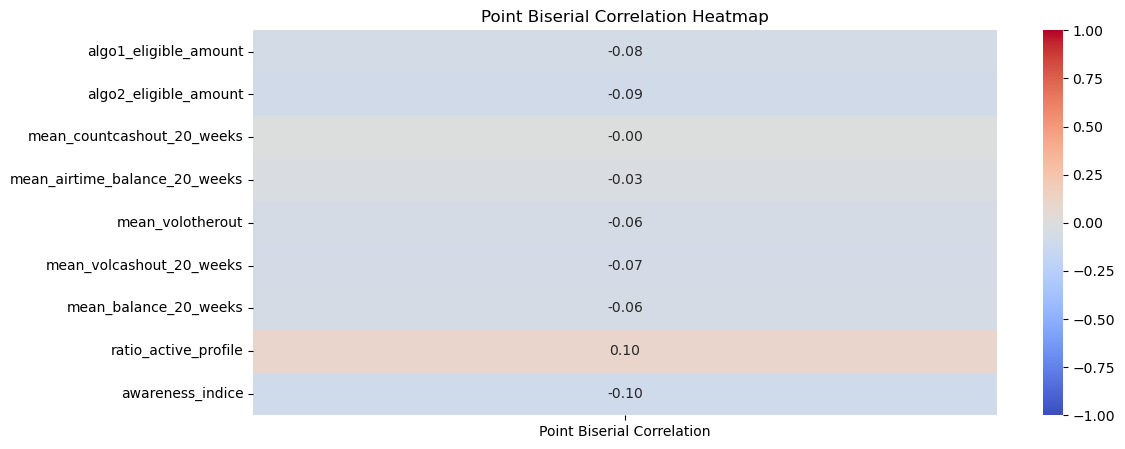

In [14]:
# List of numeric features
numeric_features = ['algo1_eligible_amount', 'algo2_eligible_amount', 'mean_countcashout_20_weeks', 'mean_airtime_balance_20_weeks',
                    'mean_volotherout', 'mean_volcashout_20_weeks', 'mean_balance_20_weeks', 'ratio_active_profile', 'awareness_indice', ]

# Calculate Point Biserial Correlation
def point_biserial_corr(binary_var, continuous_var):
    return stats.pointbiserialr(binary_var, continuous_var)

# Create a correlation matrix
correlation_matrix = pd.DataFrame(index=numeric_features, columns=['Point Biserial Correlation'])

# Calculate the Point Biserial Correlation for each continuous feature
for feature in numeric_features:
    correlation_matrix.loc[feature, 'Point Biserial Correlation'] = float(point_biserial_corr(df['is_default60'], df[feature])[0])

# Convert the data type of correlation_matrix to float
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', vmin=-1, vmax=1, yticklabels=numeric_features)
plt.title("Point Biserial Correlation Heatmap")
plt.show()

- The Point Biserial Correlation results show that the majority of the features have a weak negative correlation with the target variable (default_60days). 
- The only feature that has a weak positive correlation with the target variable is the ratio_active_profile. Therefore, it is possible that the feature ratio_active_profile could be a potentially important predictor for the classification task. 
- However, overall, the low correlation values suggest that the individual features alone may not be sufficient for accurate prediction, and it is likely that a combination of features will be necessary.

Lets creates new features and see if we can find stronger point biserial correlations

In [15]:
# Add the path to the "src" folder to the module search path
src_path = os.path.join(credit_default_dir, 'src')
sys.path.append(src_path)

# Import the "process_data" function from "data_processing.py"
from data_processing import process_data
df_processed_num = process_data(df)

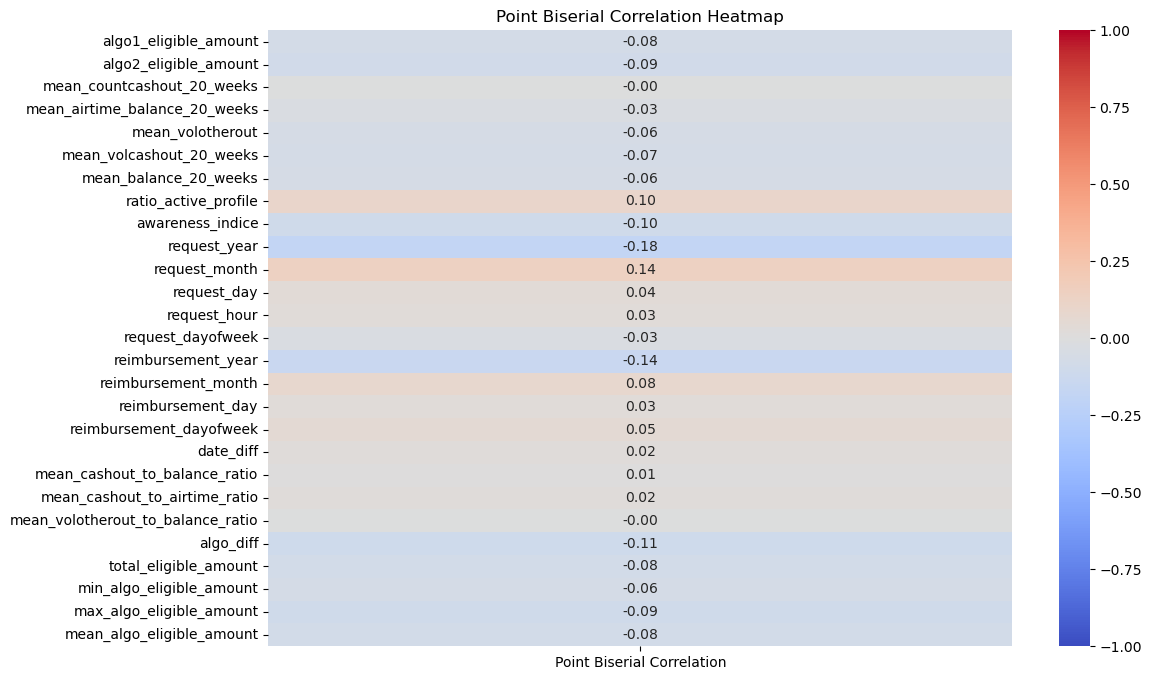

In [16]:
# List of numeric features
numeric_features = df_processed_num.drop('is_default60', axis=1).columns

# Calculate Point Biserial Correlation
def point_biserial_corr(binary_var, continuous_var):
    return stats.pointbiserialr(binary_var, continuous_var)

# Create a correlation matrix
correlation_matrix = pd.DataFrame(index=numeric_features, columns=['Point Biserial Correlation'])

# Calculate the Point Biserial Correlation for each continuous feature
for feature in numeric_features:
    correlation_matrix.loc[feature, 'Point Biserial Correlation'] = float(point_biserial_corr(df['is_default60'], df_processed_num[feature])[0])

# Convert the data type of correlation_matrix to float
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', vmin=-1, vmax=1, yticklabels=numeric_features)
plt.title("Point Biserial Correlation Heatmap")
plt.show()

- The feature with the highest correlation with the target variable is ratio_active_profile, with a positive correlation of 0.10, meaning that a higher volatility in the customer's transactions is associated with a higher likelihood of default. The feature with the highest negative correlation is awareness_indice, with a negative correlation of -0.10, suggesting that a higher level of understanding of the credit offer is associated with a lower likelihood of default.

- Other features that are negatively correlated with the target variable include algo1_eligible_amount, algo2_eligible_amount, and total_eligible_amount, which are all related to the amount of credit the customer is eligible for. Meanwhile, reimbursement_year has a moderate negative correlation with the target variable, suggesting that customers who took out loans in more recent years are less likely to default.

- On the other hand, request_month and reimbursement_dayofweek have a moderate positive correlation with the target variable, indicating that customers who apply for loans during certain months or on certain days of the week are more likely to default. However, these correlations are weaker compared to ratio_active_profile and awareness_indice.

- Overall, the results suggest that some features may be more useful than others in predicting default. But note that the fact that some features have low correlation with the target variable in a linear relationship does not necessarily mean they are not important. The relationships could be non-linear relationships, and more sophisticated models that can capture such relationships may be needed for better performance.

## Boxplots

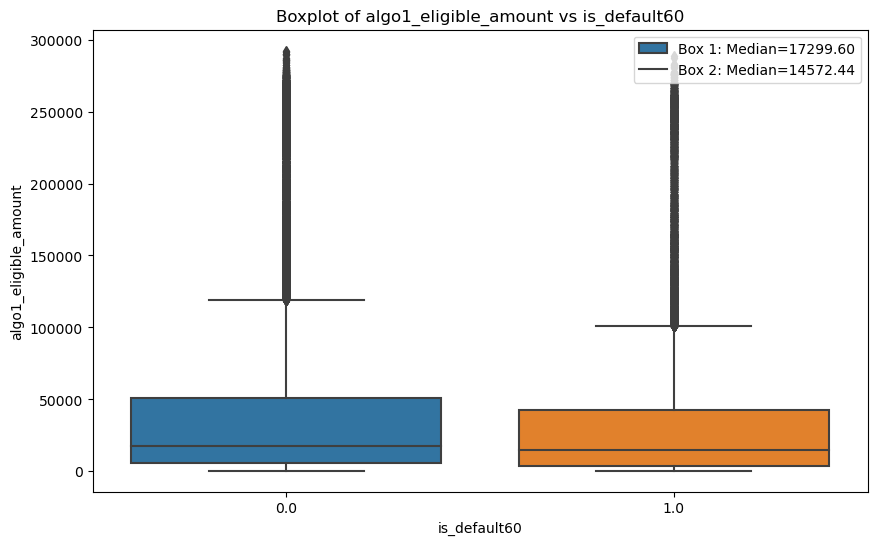

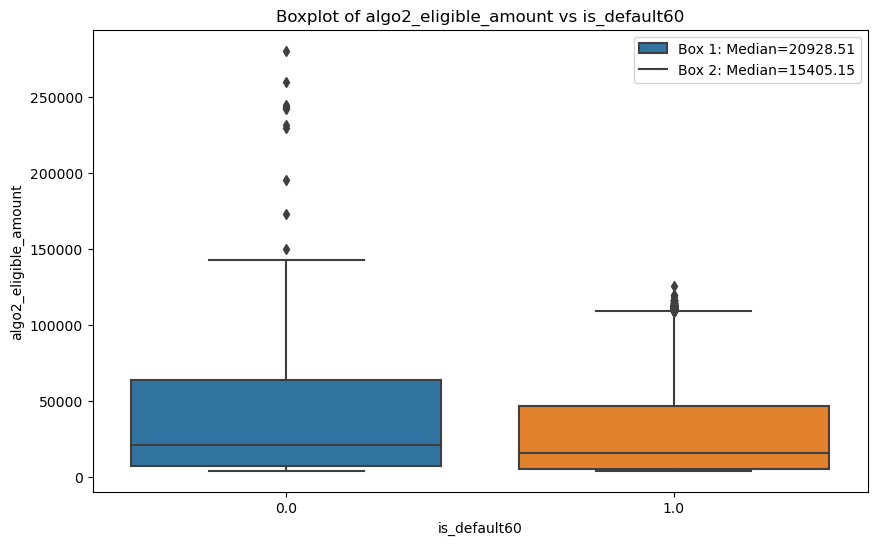

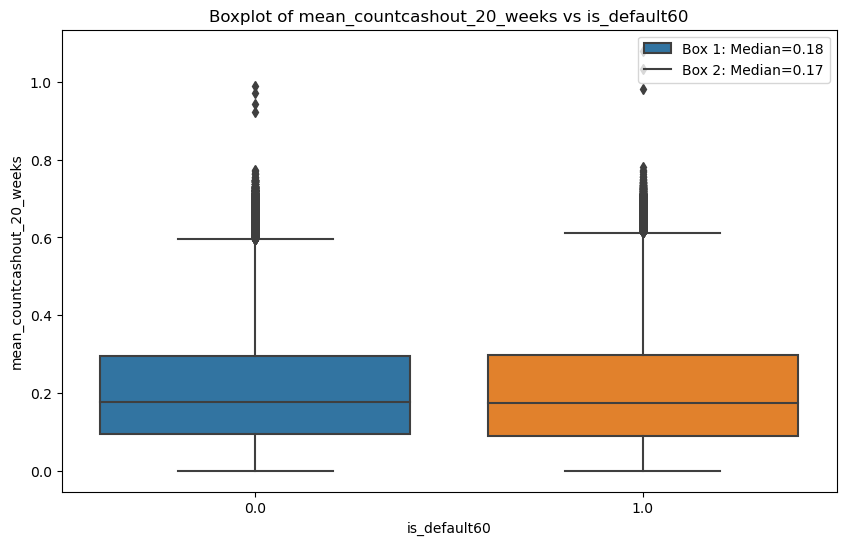

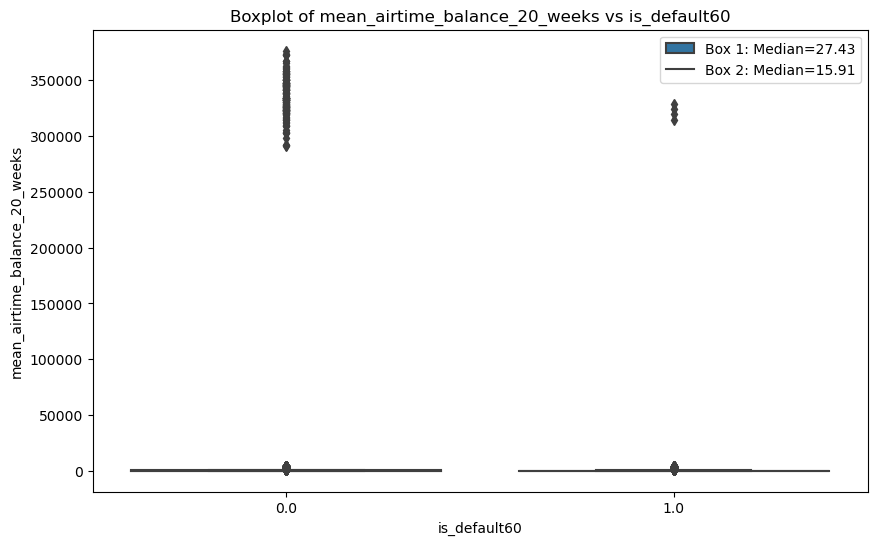

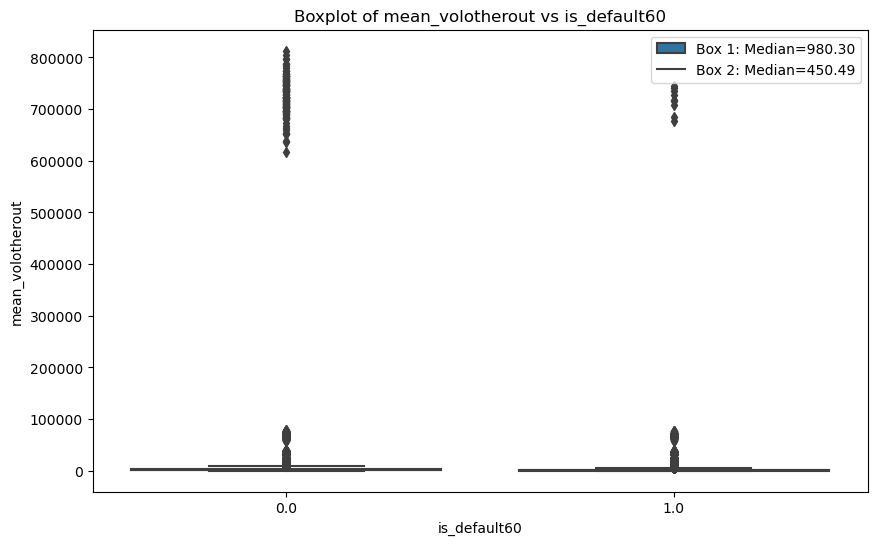

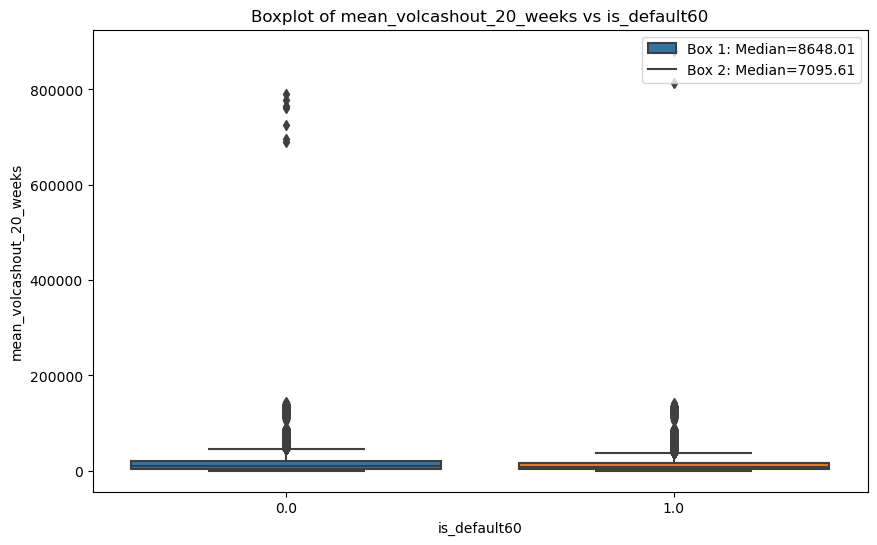

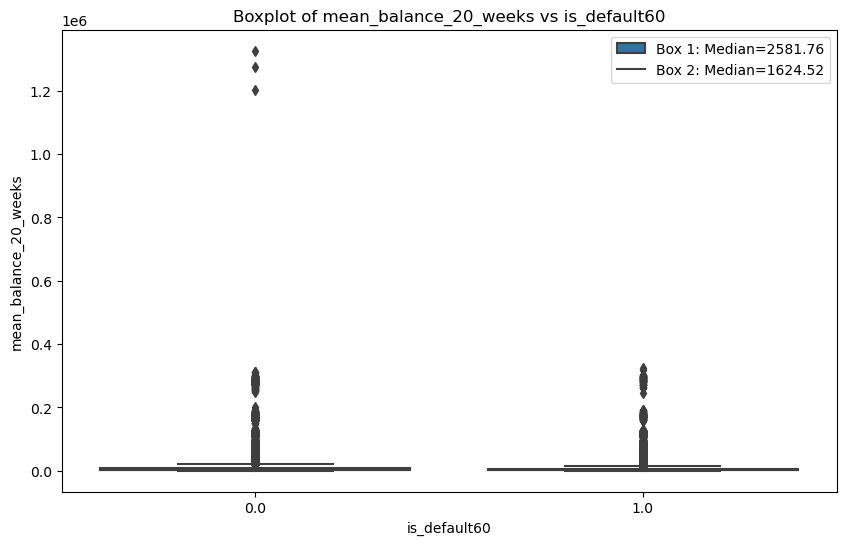

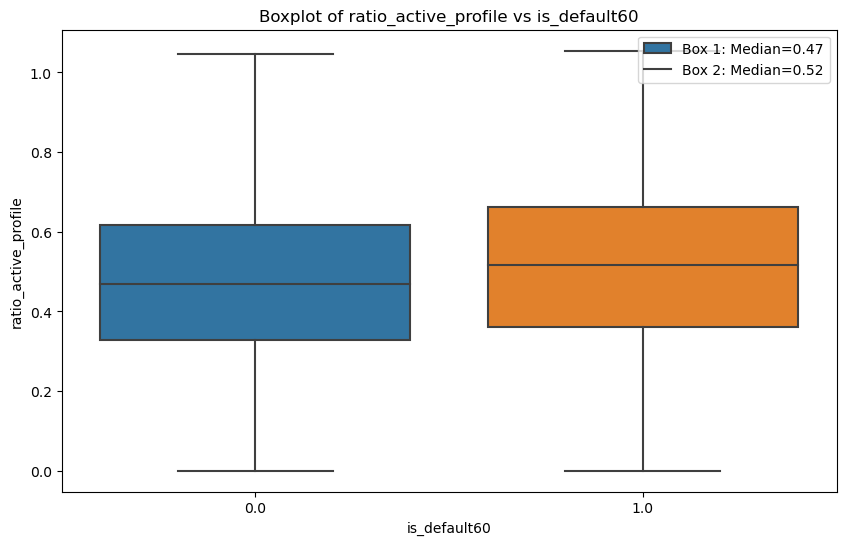

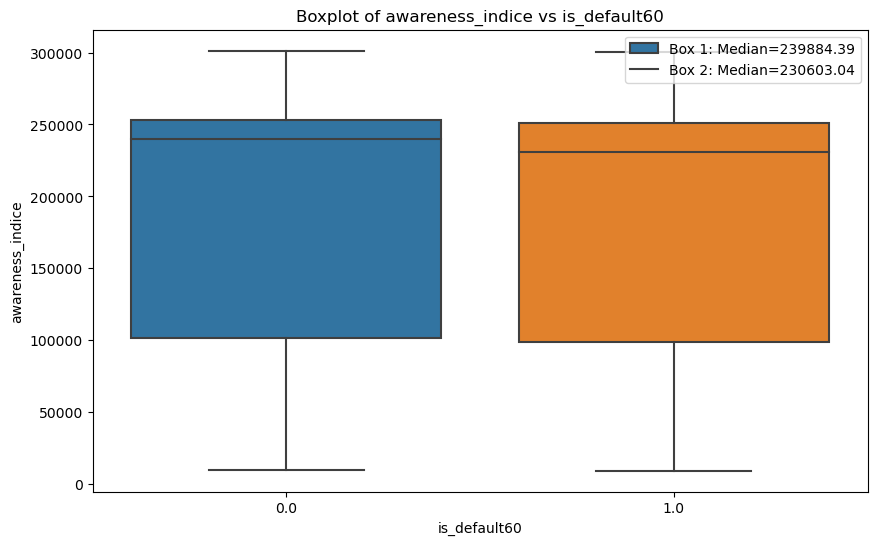

In [18]:
# List of numeric features
numeric_features = ['algo1_eligible_amount', 'algo2_eligible_amount', 'mean_countcashout_20_weeks', 'mean_airtime_balance_20_weeks',
                    'mean_volotherout', 'mean_volcashout_20_weeks', 'mean_balance_20_weeks', 'ratio_active_profile', 'awareness_indice', ]
# Plot boxplots for each numeric feature against the target variable
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="is_default60", y=feature, data= df.select_dtypes(include='number'))
    plt.title(f"Boxplot of {feature} vs is_default60")
    # Add median to the plot
    median1 = df[df["is_default60"] == 0][feature].median()
    median2 = df[df["is_default60"] == 1][feature].median()
    legend_text1 = f"Box 1: Median={median1:.2f}"
    legend_text2 = f"Box 2: Median={median2:.2f}"
    plt.legend([legend_text1, legend_text2], loc="upper right")
    plt.show()


Some boxplots are flatted, we can use the log in order to better visualize them

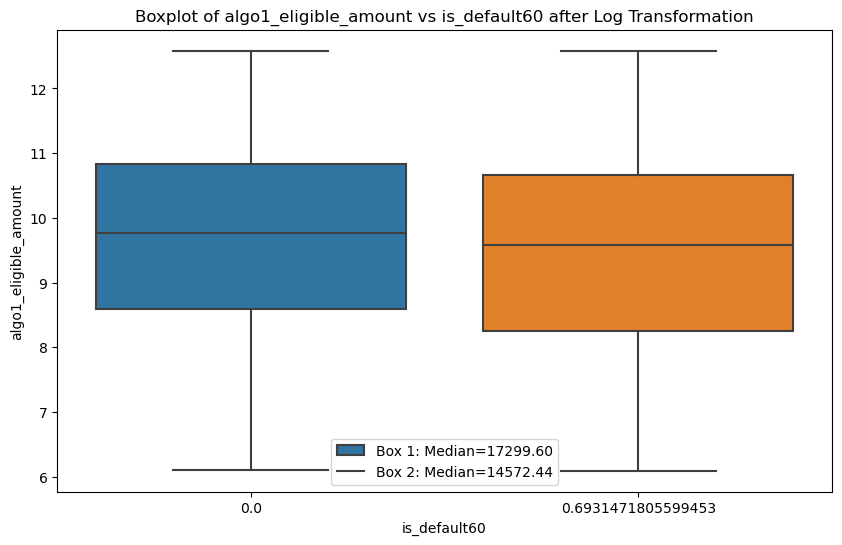

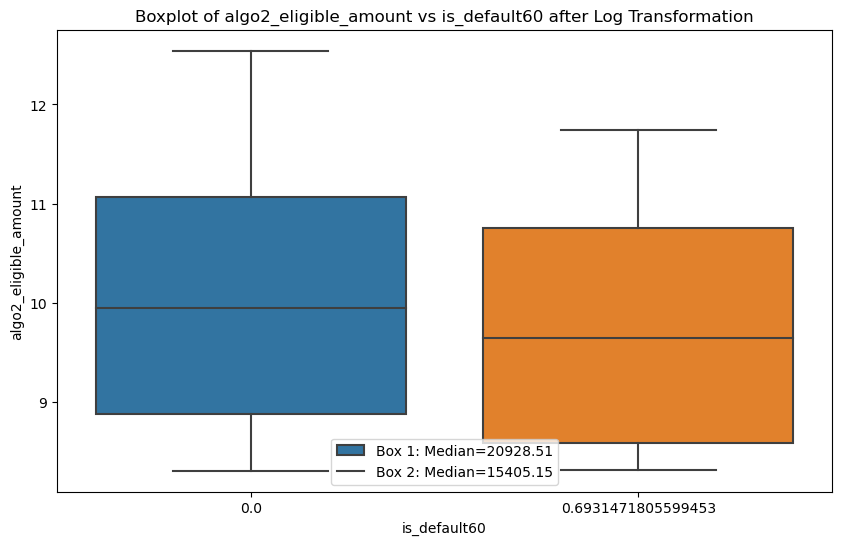

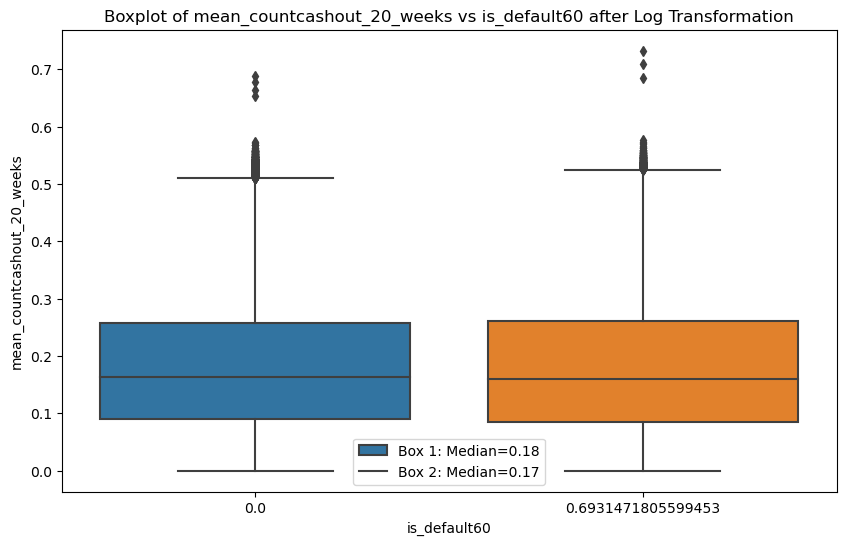

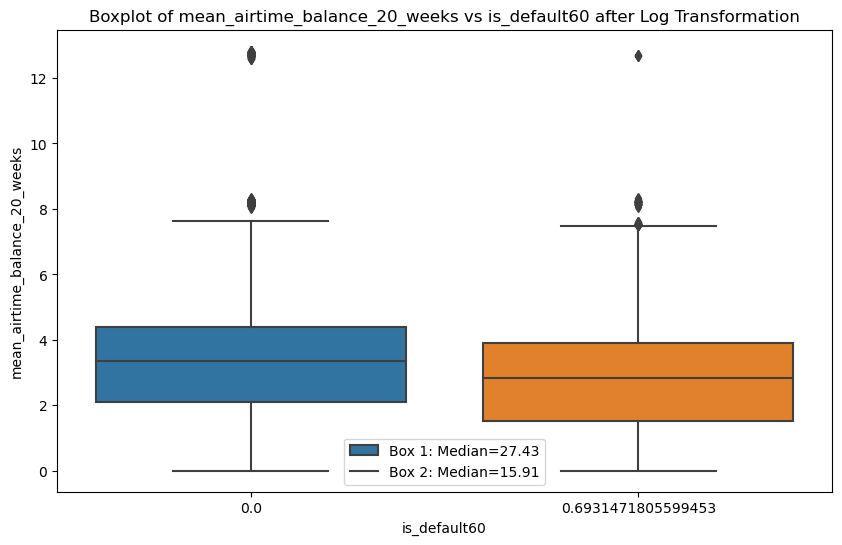

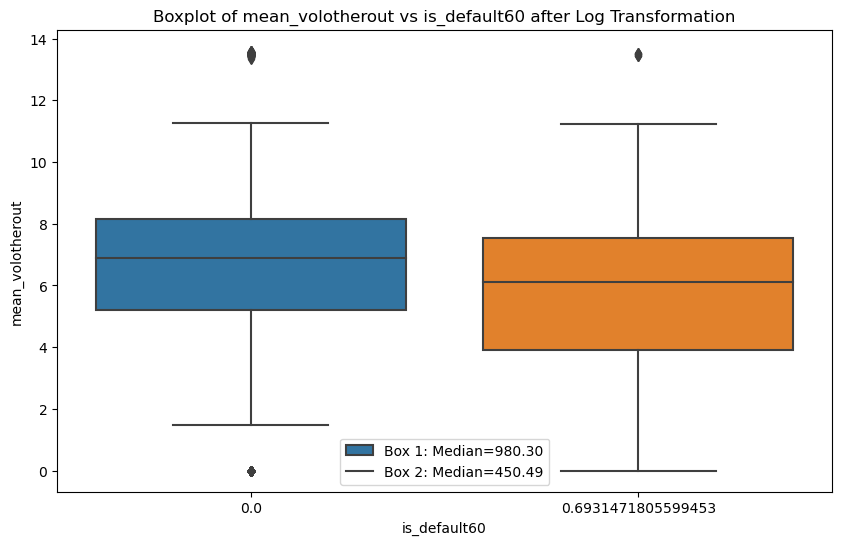

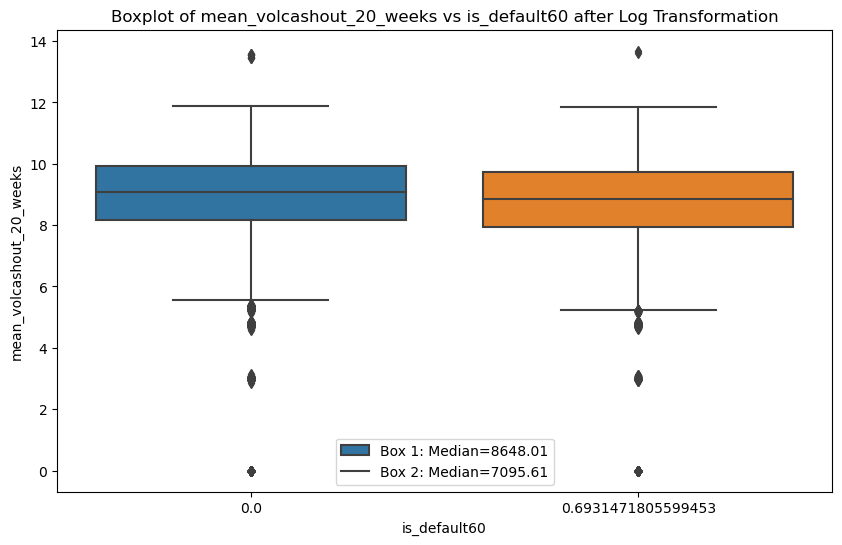

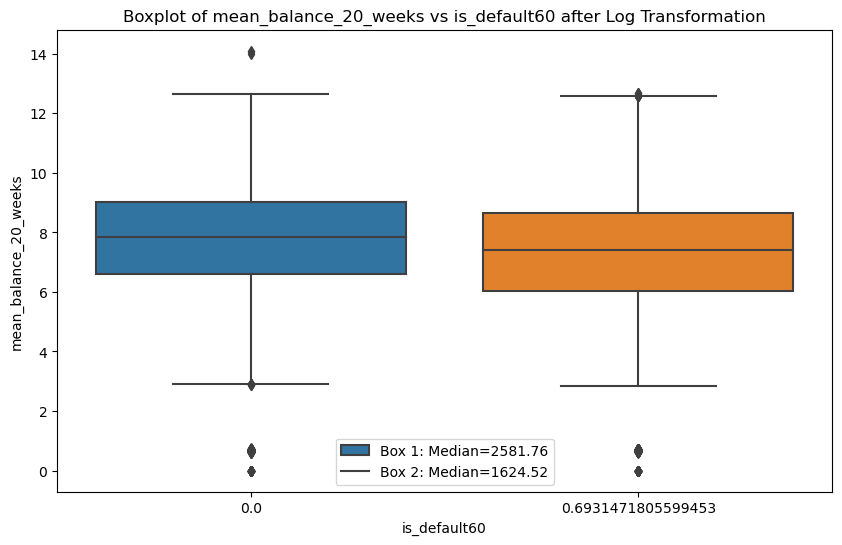

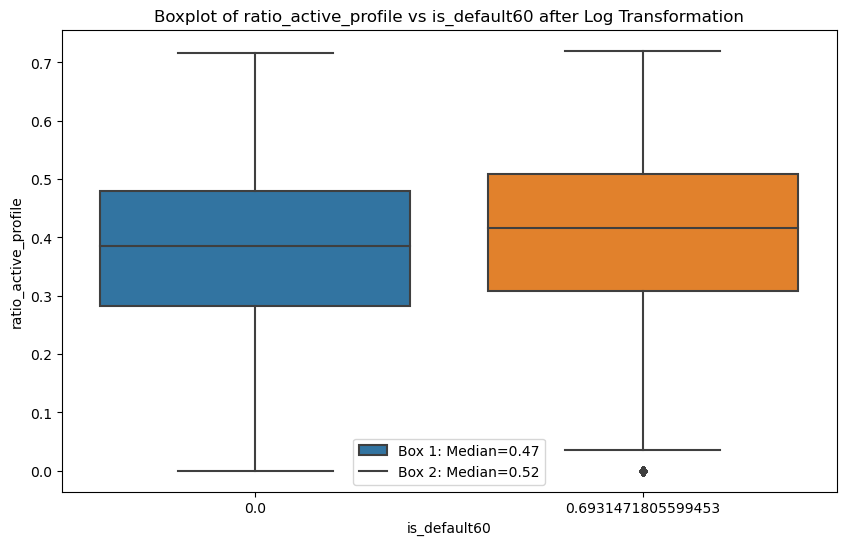

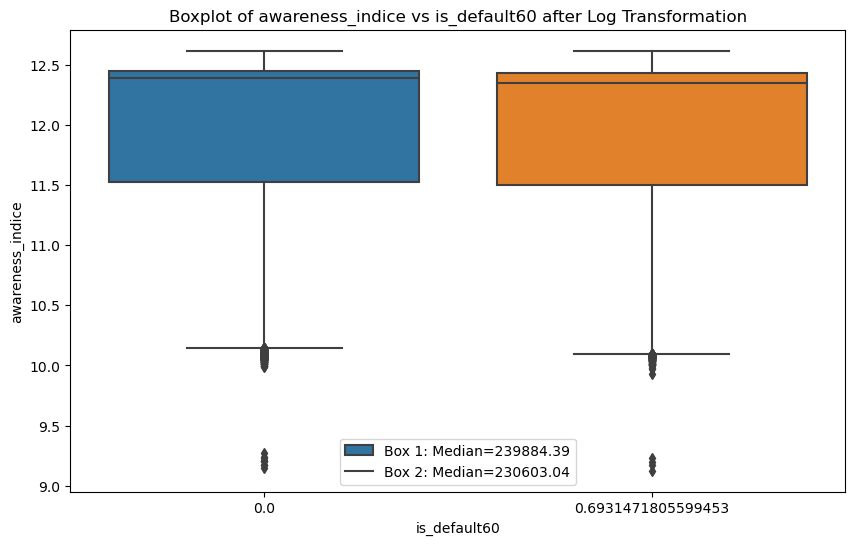

In [19]:
df_log = np.log1p(df.select_dtypes(include='number'))

# Plot boxplots for each numeric feature against the target variable
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="is_default60", y=feature, data= df_log)
    plt.title(f"Boxplot of {feature} vs is_default60 after Log Transformation")
    # Add median to the plot
    median1 = df[df["is_default60"] == 0][feature].median()
    median2 = df[df["is_default60"] == 1][feature].median()
    legend_text1 = f"Box 1: Median={median1:.2f}"
    legend_text2 = f"Box 2: Median={median2:.2f}"
    plt.legend([legend_text1, legend_text2], loc="lower center")
    plt.show()

Main takeaways:

- In general, the boxplots show no clear linear relationship between the numerical features and the target variable.
- However, there appears to be a slight relationship between the features "algo1_eligible_amount" and "algo2_eligible_amount" and the target variable: individuals who default tend to have smaller amounts for these features.
- Based on these findings, it may be necessary to use algorithms that can capture non-linear relationships in order to effectively classify default risk.

# Conclusion

In summary,
- The analysis indicates that there is no strong linear relationship between the features and the target. Therefore, non-linear models may be more effective for this classification task. 
- Additionally, the right-skewed distribution of some features may affect the performance of some algorithms. Hence, feature scaling or transformations, such as log transformation, may be necessary. 
- Finally, the multiple Gaussian distribution in awareness_indice could indicate the presence of different customer segments with different levels of understanding of the credit offer, which may require a more targeted approach.